In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from apyori import apriori
import itertools

In [2]:
data = pd.read_csv('groceries.csv')

In [3]:
data.shape

(9835, 41)

In [4]:
#Finding all items present in our data - groceries.csv
#We will have to use the csv package so that we can read each line one by one and update any new grocery item.
all_items = set()#set of all items
with open("groceries.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        all_items.update(line)

#Now, we count how many time each particular item appears in the data and update it in a list format.
counting = list()
with open("groceries.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row = {item:0 for item in all_items}
        row.update({item:1 for item in line})
        counting.append(row)

groceries = pd.DataFrame(counting)

groceries.head()

,,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


                Item_name  Item_count  Item_percent  Tot_percent
0              whole milk        2513      0.057946     0.057946
1        other vegetables        1903      0.043880     0.101826
2              rolls/buns        1809      0.041713     0.143539
3                    soda        1715      0.039545     0.183084
4                  yogurt        1372      0.031636     0.214721
5           bottled water        1087      0.025065     0.239785
6         root vegetables        1072      0.024719     0.264504
7          tropical fruit        1032      0.023796     0.288300
8           shopping bags         969      0.022344     0.310644
9                 sausage         924      0.021306     0.331950
10                 pastry         875      0.020176     0.352126
11           citrus fruit         814      0.018770     0.370896
12           bottled beer         792      0.018262     0.389158
13             newspapers         785      0.018101     0.407259
14            canned beer

Text(0.5, 1.0, 'Item sales distribution')

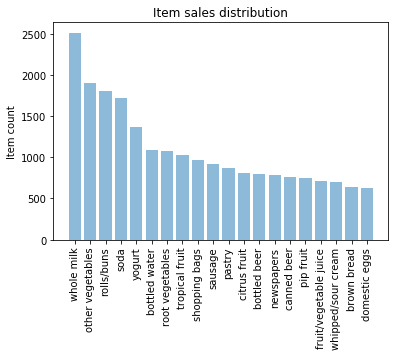

In [5]:
# Finding item count is now easy - we need to sum it up.
# 1. Find total number of items sum of all the sums of rows
tot_item_count = sum(groceries.sum()) # Answer is 43368
# 2. Sum the rows and sort is descending order to get top 20 items
item_sum = groceries.sum().sort_values(ascending = False).reset_index().head(n=20)
item_sum.rename(columns={item_sum.columns[0]:'Item_name',item_sum.columns[1]:'Item_count'}, inplace=True)
# 3. Add the percent so that we know how much it contributes. #Tot_percent of x determines the percentage of x and above elements in the total percentage i.e cumulative sum.
item_sum['Item_percent'] = item_sum['Item_count']/tot_item_count
item_sum['Tot_percent'] = item_sum.Item_percent.cumsum()
print(item_sum.head(20)) # List of top 20 items with percents
# Plotting Code
# We will plot later, so that we can plot items + frequent items.
# But the function can be called here as well.
# Alternative Code

obj = (list(item_sum['Item_name'].head(n=20)))
y_pos = np.arange(len(obj))
performance = list(item_sum['Item_count'].head(n=20))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, obj, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

In [6]:
groceries

,,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def prune_dataset(olddf, len_transaction, tot_sales_percent):
    # Delete the last column tot_items if present
    if 'tot_items' in olddf.columns:
        del(olddf['tot_items'])
    #Finding the item_count for each item and total number of items. This is the same code as in step 3    
    Item_count = olddf.sum().sort_values(ascending = False).reset_index()
    tot_items = sum(olddf.sum().sort_values(ascending = False))
    Item_count.rename(columns={Item_count.columns[0]:'Item_name',Item_count.columns[1]:'Item_count'}, inplace=True)
    
    # Code from Step 3 to find Item Percentage and Total Percentage.
    Item_count['Item_percent'] = Item_count['Item_count']/tot_items
    Item_count['Tot_percent'] = Item_count.Item_percent.cumsum()
    
    # Taking items that fit the condition/ minimum threshold for total sales percentage.
    selected_items = list(Item_count[Item_count.Tot_percent < tot_sales_percent].Item_name)
    olddf['tot_items'] = olddf[selected_items].sum(axis = 1)
    
    # Taking items that fit the condition/ minimum threshold for length of transaction or number of items in a row.
    olddf = olddf[olddf.tot_items >= len_transaction]
    del(olddf['tot_items'])
    
    #Return pruned dataframe.
    return olddf[selected_items], Item_count[Item_count.Tot_percent < tot_sales_percent]



In [8]:
pruneddf, Item_count = prune_dataset(groceries,4,0.4)
print(pruneddf.shape)
print(list(pruneddf.columns))

(1267, 13)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer']


In [9]:
pruneddf, Item_count = prune_dataset(groceries,4,0.5)
print(pruneddf.shape)
print(list(pruneddf.columns))


(1998, 19)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'newspapers', 'canned beer', 'pip fruit', 'fruit/vegetable juice', 'whipped/sour cream', 'brown bread']


In [10]:
pruneddf, Item_count = prune_dataset(groceries,2,0.5)
print(pruneddf.shape)
print(list(pruneddf.columns))

(5391, 19)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'newspapers', 'canned beer', 'pip fruit', 'fruit/vegetable juice', 'whipped/sour cream', 'brown bread']


In [11]:
# Converting one's to appropriate item name(column name)
y = list(pruneddf.columns)
for s in y:
    #s is column name
    pruneddf.loc[(pruneddf[s] == 1),s]=s
#Removing Zero's
lol = pruneddf.values.tolist() 
for a in lol:
    while (0 in a):
        a.remove(0)
#Making a new pruned dataset csv file
with open("pruned.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(lol) 

[(2172, 'whole milk'), (1691, 'other vegetables'), (1524, 'rolls/buns'), (1366, 'soda'), (1232, 'yogurt'), (988, 'root vegetables'), (952, 'tropical fruit'), (944, 'bottled water'), (844, 'sausage'), (839, 'shopping bags'), (770, 'pastry'), (744, 'citrus fruit'), (677, 'pip fruit'), (674, 'newspapers'), (643, 'fruit/vegetable juice'), (632, 'whipped/sour cream'), (575, 'bottled beer'), (570, 'brown bread'), (429, 'canned beer')]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
Count    19 non-null int64
Word     19 non-null object
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes
None
C2:  [('tropical fruit', 'whole milk'), ('tropical fruit', 'whipped/sour cream')]
length :  171

Ct Length :  171

L Length :  9

[(736, ('other vegetables', 'whole milk')), (557, ('rolls/buns', 'whole milk')), (551, ('whole milk', 'yogurt')), (481, ('root vegetables', 'whole milk')), (466, ('other vegetables', 'root vegetables')), (427, ('other ve

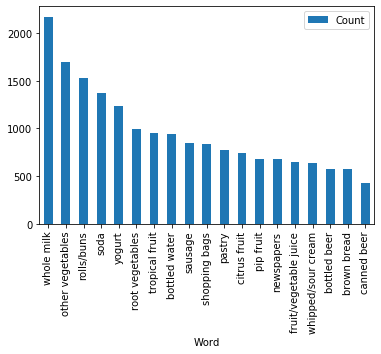

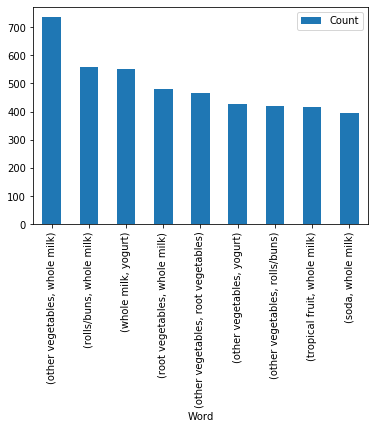

In [13]:
# This code is for applying apriori to pruned data section
import csv
import itertools
#Delete Files prunedRules and PrunedFItems otherwise new data will be appended.
Groceries = open('pruned.csv', 'r')
#Minimum Support Count
min_support = 0.04
Rules = "prunedRules.txt"
freqItemsets = "prunedFItems.txt"
#Mininum Confidence
min_confidence = 0.30

# Finding all Frequent 1-Item sets
def OneItemSets():
    #Get all 1-itemsets in the list items and their counts in the dictionary counts
    DataCaptured = csv.reader(Groceries, delimiter=',')
    data = list(DataCaptured)
    for e in data:
        e = sorted(e)
    count = {}
    for items in data:
        for item in items:
            if item not in count:
                count[(item)] = 1
            else:
                count[(item)] = count[(item)] + 1

    count2 = {k: v for k, v in count.items() if v >= min_support*9835}

    return count2, data

#Ck is a superset of Lk. It is a part of Prune Step. its members may or may not be frequent, but all of the frequent k-itemsets are included in Ck.
# Generated by joing two Lk
def generateCk(Lk_1, flag, data):
    Ck = []
    if flag == 1:
        flag = 0
        for item1 in Lk_1:
            for item2 in Lk_1:
                if item2 > item1:
                    Ck.append((item1, item2))
        print("C2: ", Ck[1:3])
        print("length : ", len(Ck))
        print()

    else:
        for item in Lk_1:
            k = len(item)
        for item1 in Lk_1:
            for item2 in Lk_1:
                if (item1[:-1] == item2[:-1]) and (item1[-1] != item2[-1]):
                    if item1[-1] > item2[-1]:
                        Ck.append(item2 + (item1[-1],))
                    else:
                        Ck.append(item1 + (item2[-1],))
        print("C" + str(k+1) + ": ", Ck[1:3])
        print("Length : ", len(Ck))
        print()
    L = generateLk(set(Ck), data)
    return L, flag

#If item in Ck belongs to a transaction, it makes it into list Ct Then Ct is thresholded to form L
# For K frequent Itemsets
def generateLk(Ck, data):
    
    count = {}
    for itemset in Ck:
        #print(itemset)
        for transaction in data:
            if all(e in transaction for e in itemset):
                if itemset not in count:
                    count[itemset] = 1
                else:
                    count[itemset] = count[itemset] + 1

    print("Ct Length : ", len(count))
    print()

    count2 = {k: v for k, v in count.items() if v >= min_support*9835}
    print("L Length : ", len(count2))
    print()
    return count2

#  Generates association rules from the frequent itemsets
def rulegenerator(fitems):
    counter = 0
    for itemset in fitems.keys():
        if isinstance(itemset, str):
            continue
        length = len(itemset)

        union_support = fitems[tuple(itemset)]
        for i in range(1, length):

            lefts = map(list, itertools.combinations(itemset, i))
            for left in lefts:
                if len(left) == 1:
                    if ''.join(left) in fitems:
                        leftcount = fitems[''.join(left)]
                        conf = union_support / leftcount
                else:
                    if tuple(left) in fitems:
                        leftcount = fitems[tuple(left)]
                        conf = union_support / leftcount
                if conf >= min_confidence:
                    fo = open(Rules, "a+")
                    right = list(itemset[:])
                    for e in left:
                        right.remove(e)
                    fo.write(str(left) + ' (' + str(leftcount) + ')' + ' -> ' + str(right) + ' (' + str(fitems[''.join(right)]) + ')' + ' [' + str(conf) + ']' + '\n')
                    print(str(left) + ' -> ' + str(right) + ' (' + str(conf) + ')')
                    counter = counter + 1
                    #Greater than 1???
                    fo.close()
    print(counter, "rules generated")
def plotitemfreq(L):
    aux = [(L[key], key) for key in L]
    aux.sort()
    aux.reverse()
    z = aux[0:20]
    print(z)
    df = pd.DataFrame(z, columns = ['Count', 'Word'])
    df['Count']=pd.to_numeric(df['Count'])
    print(df.info())
    df.plot.bar(x='Word', y='Count')

def apriori():
    L, data = OneItemSets()
    flag = 1
    FreqItems = dict(L)
    while(len(L) != 0):
        fo = open(freqItemsets, "a+")
        for k, v in L.items():
           
            fo.write(str(k) + ' >>> ' + str(v) + '\n\n')
        fo.close()
        plotitemfreq(L)

        L, flag = generateCk(L, flag, data)
        FreqItems.update(L)
    rulegenerator(FreqItems)


if __name__ == '__main__':
    apriori()